In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
warnings.filterwarnings("ignore") #ignoring the warnings
%matplotlib inline

## 1. Load the dataset

In [2]:
df=pd.read_csv("parkinsons.data")
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


## 2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset.

In [3]:
# printing the dimensions of the dataset
df.shape
# dataset is having 195 records with 24 features

(195, 24)

In [4]:
df.info()
# except name feature remaining all features are numeric features
# we can obeserve that there are no missing values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [5]:
# status column is the target feature for the dataset
df.status.value_counts()
#since class 1 is having significantly more records comapared to class 0. the dataset is slightly imbalanced.

1    147
0     48
Name: status, dtype: int64

In [6]:
print(df.name.nunique())
#since name is unique there is significance of name feature in model building, we can drop that feature
df=df.drop('name',axis=1)

195


In [7]:
df.head(10)
# we can see from the data that each column is in different scale so scaling is required on this dataset.

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,0.456,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,0.140,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,0.134,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,0.191,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,0.255,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


## 3. Using univariate & bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations

In [8]:
# Descriptive analysis of each feature
df.describe().T
# From the description we observe the central tendancies of each feature 
# we can observe that mean and median of several features are similar.

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


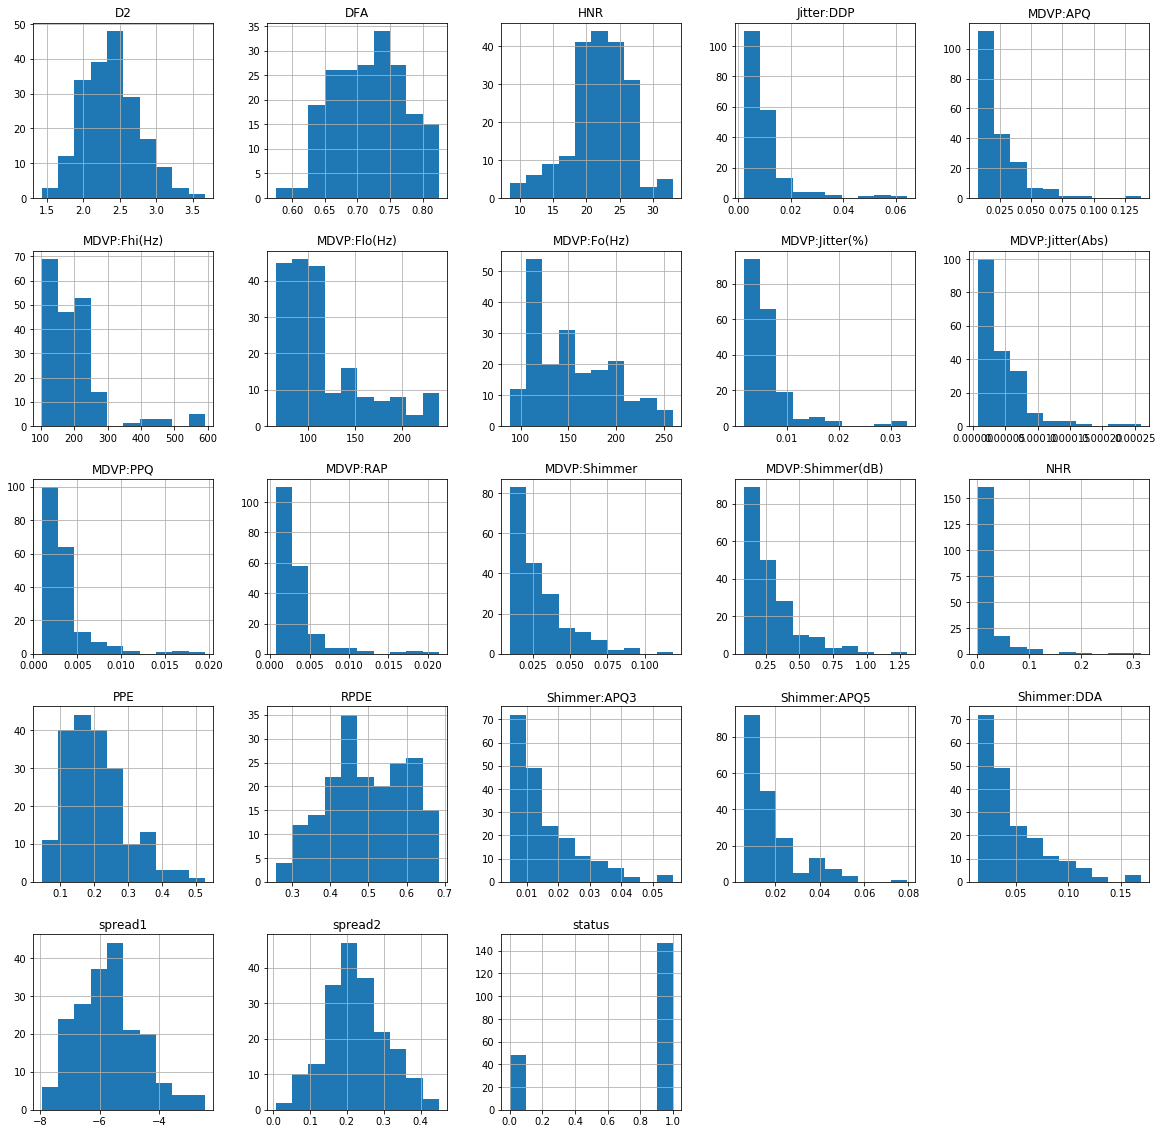

In [9]:
# perform univariant analysis using histogram plot of all features
df.hist(figsize = [20,20])
plt.show()
## Observations :
# Features like - MDVP(fhi,flo,jitter%, jitter abs,RAP,PPQ), Shimmer,NHR are right skewed
# Features like - HNR, RDE,DFA, spread1, spread2,D2,PPE are close to normal distribution
# Status feature is a categorical variable with more records belonging to status=1
# All MDVP based features representing the same distribution
# All shimmer based features are representing the similar distribution

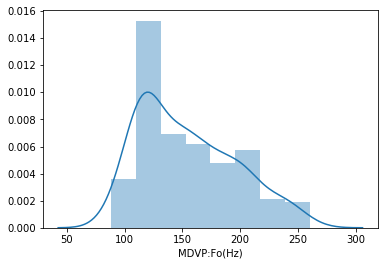

In [10]:
sns.distplot(df['MDVP:Fo(Hz)'])
plt.show()
# MDVP: F0(Hz) feature has avg freq range from 90-260 and central tendancy around 150Hz and is Right skewed

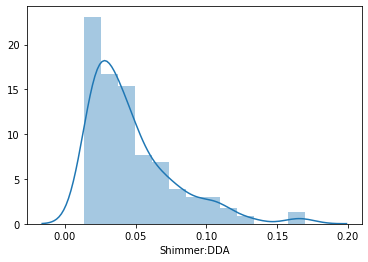

In [11]:
sns.distplot(df['Shimmer:DDA'])
plt.show()
# Shimmer DDA column range from 0.025 to 0.05 and central tendacy around 0.04 and is Right skewed.

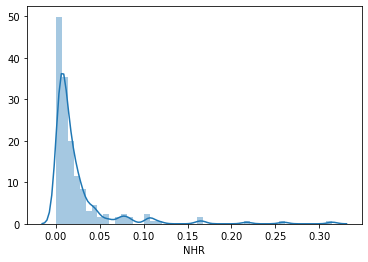

In [12]:
sns.distplot(df.NHR)
plt.show()
#NHR ranges from 0 to 0.05 and is more skewed to right.

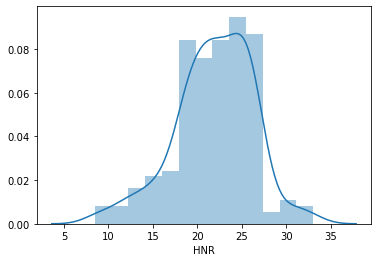

In [13]:
sns.distplot(df.HNR)
plt.show()
# HNR varies from 8 to 32 and is slightly left Skewed.

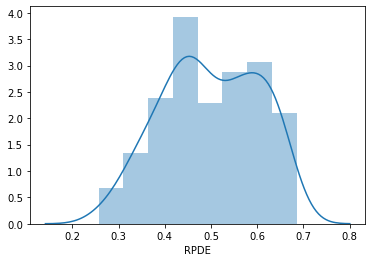

In [14]:
sns.distplot(df.RPDE)
plt.show()
#RPDE is in range from 0.4 to 0.7. and is close to normal distribution with mean and median around 0.49

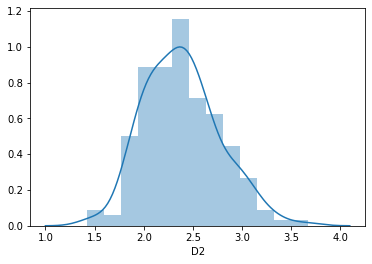

In [15]:
sns.distplot(df.D2)
plt.show()
#D2 ranges from 1.75 to 3.5, looks normally distributed with mean and median around 2.3

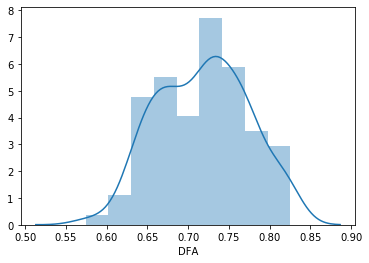

In [16]:
sns.distplot(df.DFA)
plt.show()
#DFA range from 0.63 to 0.8 and is close to normal with similar mean and median values

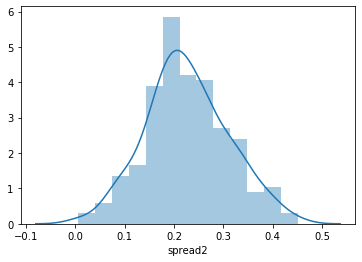

In [17]:
sns.distplot(df.spread2)
plt.show()
#Spread2 range from 0.1 to 0.35 and close to normal distribution with avg around

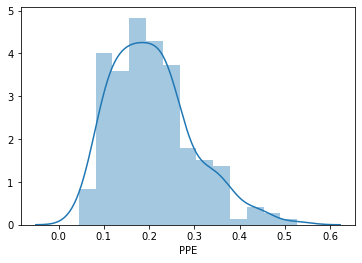

In [18]:
sns.distplot(df.PPE)
plt.show()
# PPE is ranging from 0.1 to 0.4 and distribution looks slightly right skewed.

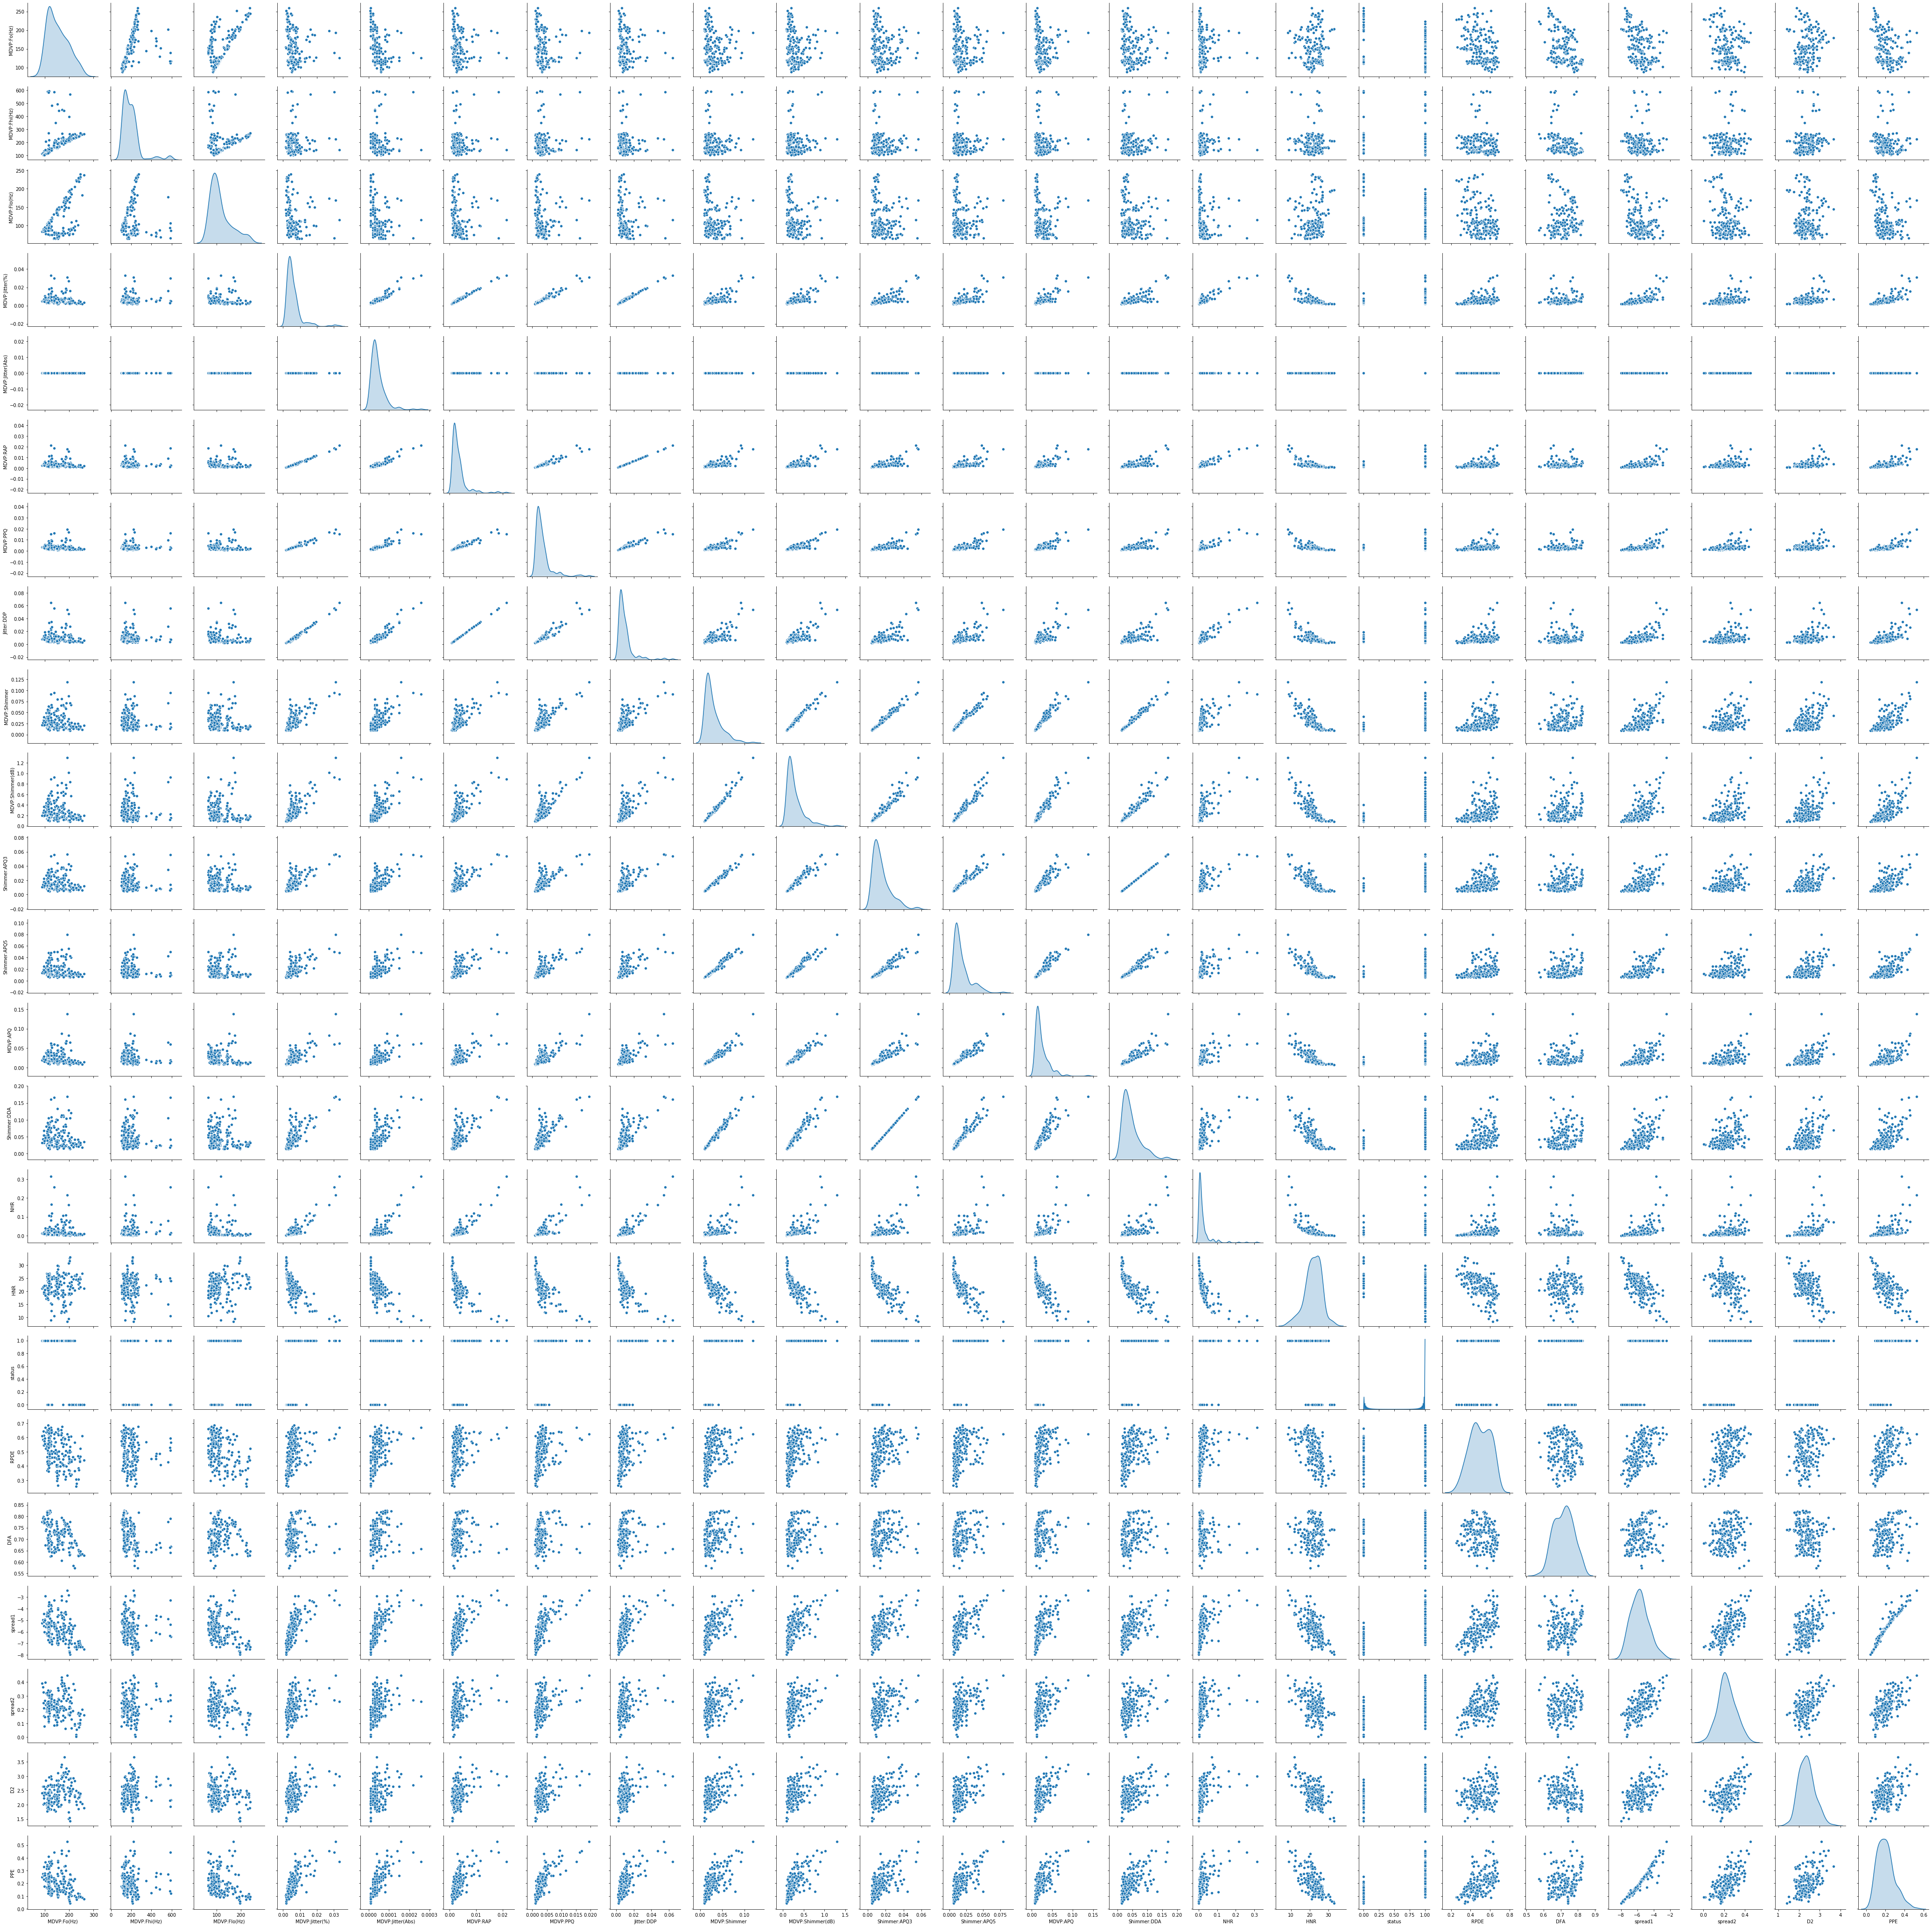

In [19]:
sns.pairplot(df, diag_kind = "kde")

In [20]:
# From pair plot we observe
# Shimmer DDA and Shimmer APQ3 are positively correlated
# MDVP(RAP) and jitter DDP have strong positive relation.
# PPE and spread1 are positively correlated.

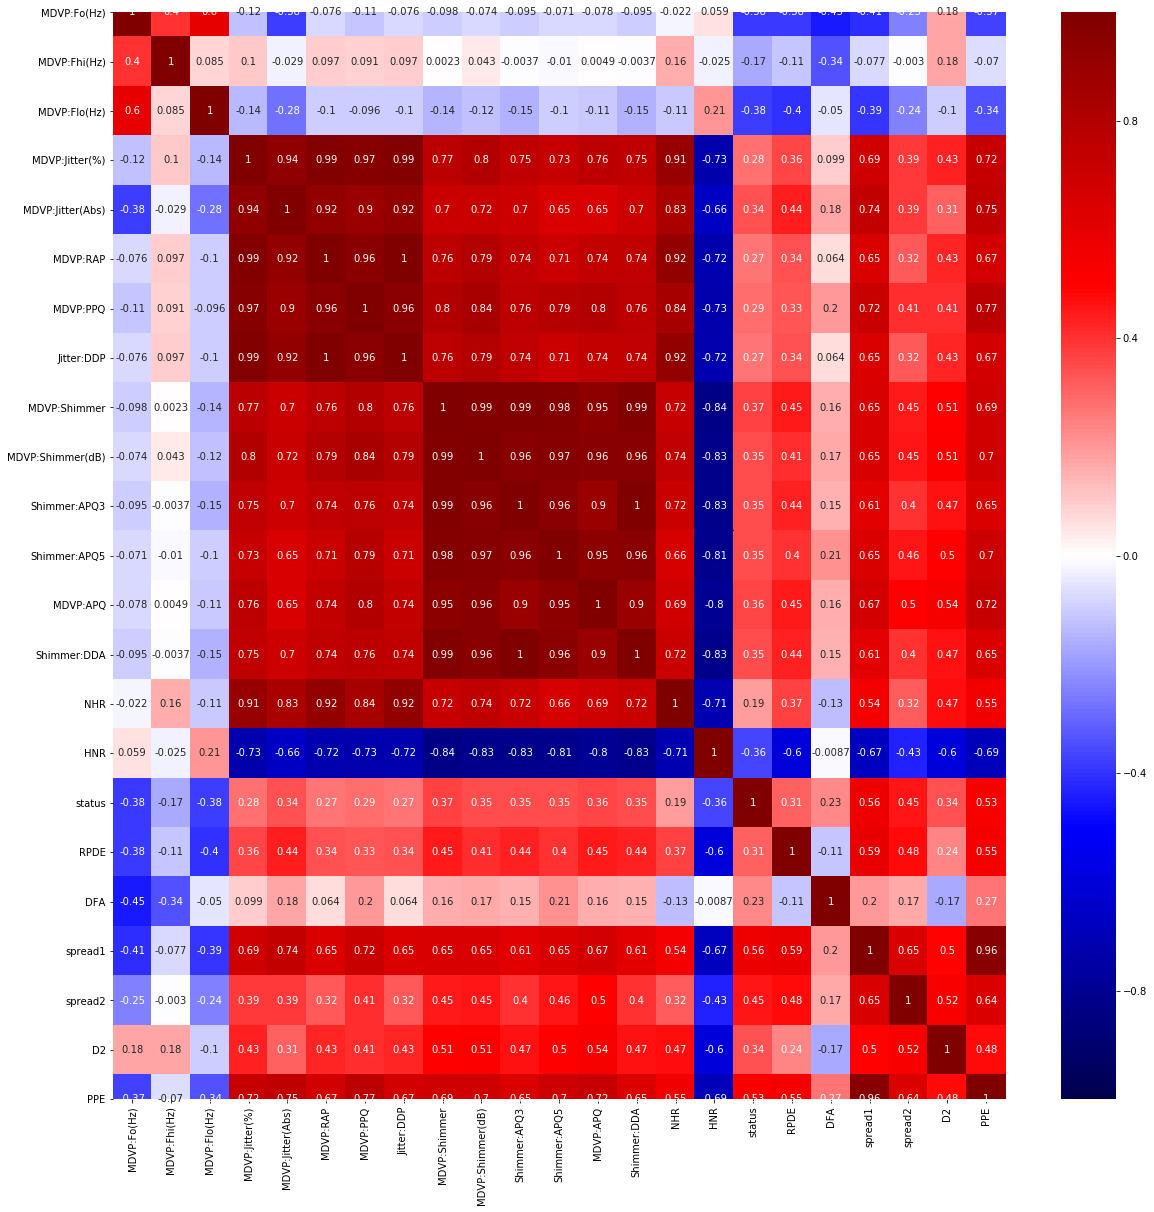

In [21]:
#Plotting heat map for finding correlation between features
plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap='seismic')
plt.show()

In [22]:
# From the above heatmap we obeserve that
# All MDVP based features are positvily correlated with each other and similarly shimmer based features.
# MDVP:Jitter(%) & MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer(dB),NHR,MDVP:APQ,Shimmer:APQ3,Shimmer:APQ5,Shimmer:DDA ,are highly positively corelated. 
# HNR and NHR are highly negatively corelated.  

## 4. Split the dataset into training and test set in the ratio of 70:30 

In [23]:
# scaling data using standardisation i.e minmax_scaler
scaler=MinMaxScaler()
columns=df.columns
df=scaler.fit_transform(df)
df=pd.DataFrame(df,columns=columns)
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,0.184308,0.112592,0.054815,0.195680,0.249012,0.145472,0.247588,0.145288,0.312215,0.280197,...,0.332584,0.068307,0.511745,1.0,0.369155,0.960148,0.569875,0.585765,0.390661,0.497310
1,0.198327,0.094930,0.278323,0.254130,0.288538,0.191233,0.323687,0.191042,0.472887,0.444536,...,0.516048,0.059331,0.432577,1.0,0.470830,0.977024,0.703277,0.741337,0.473145,0.671326
2,0.165039,0.059128,0.265288,0.280178,0.328063,0.229287,0.369239,0.229411,0.390634,0.326212,...,0.443317,0.039596,0.496220,1.0,0.404416,1.000000,0.636745,0.686371,0.408819,0.596682
3,0.165004,0.072927,0.264200,0.263342,0.328063,0.209056,0.324759,0.208862,0.414278,0.354971,...,0.475478,0.040997,0.495936,1.0,0.416255,0.975885,0.695627,0.738089,0.436977,0.671949
4,0.161150,0.080909,0.260107,0.354511,0.407115,0.282755,0.437299,0.282870,0.499452,0.410025,...,0.584542,0.054174,0.455499,1.0,0.375159,0.992813,0.762472,0.513798,0.404336,0.757611


In [24]:
X=df.drop('status',axis=1)
y=df['status']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
print("Shape of training data set :",X_train.shape,y_train.shape)
print("Shape of testing data set :",X_test.shape,y_test.shape)

Shape of training data set : (136, 22) (136,)
Shape of testing data set : (59, 22) (59,)


## 5. Create the model using “entropy” method of reducing the entropy and fit it to training data

In [25]:
# Fitting Decision tree classifier on training data with entropy as the criterion.
dtree=DecisionTreeClassifier(criterion='entropy',random_state=100)
dtree.fit(X_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [26]:
# model is overfit
print("Accuracy of model on training data :",accuracy_score(y_train,dtree.predict(X_train)))

Accuracy of model on training data : 1.0


## 6. Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab.

In [27]:
# performance of model on test data
predictions=dtree.predict(X_test)
print("\nAccuracy Score on test data: ", accuracy_score(y_test,predictions))
print("\nConfusion Matrix\n",confusion_matrix(y_test, predictions))
print("\nCrosstab : \n",pd.crosstab(y_test, predictions,margins = True) )


Accuracy Score on test data:  0.9152542372881356

Confusion Matrix
 [[13  0]
 [ 5 41]]

Crosstab : 
 col_0   0.0  1.0  All
status               
0.0      13    0   13
1.0       5   41   46
All      18   41   59


In [28]:
pd.Series(dtree.feature_importances_, X_train.columns).sort_values(ascending = False)
# only 6-8 features are most useful in the entire model so we can ignore other columns 

PPE                 0.309505
MDVP:Fhi(Hz)        0.170587
MDVP:APQ            0.126825
RPDE                0.076591
spread2             0.074967
DFA                 0.071018
MDVP:Flo(Hz)        0.054104
NHR                 0.041916
D2                  0.038739
MDVP:PPQ            0.035749
Jitter:DDP          0.000000
MDVP:Jitter(%)      0.000000
MDVP:Jitter(Abs)    0.000000
MDVP:RAP            0.000000
Shimmer:APQ3        0.000000
MDVP:Shimmer        0.000000
MDVP:Shimmer(dB)    0.000000
Shimmer:APQ5        0.000000
Shimmer:DDA         0.000000
HNR                 0.000000
spread1             0.000000
MDVP:Fo(Hz)         0.000000
dtype: float64

## 7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help

In [29]:
#Regularised Decision Tree classifier with max depth of 6 and min_sample_split = 2
dtree1=DecisionTreeClassifier(criterion = 'entropy', max_depth =6,random_state=100 , min_samples_split=2,min_impurity_decrease=0.25)
dtree1.fit(X_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.25, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [30]:
#trainind accuracy model dropped after regularisation
print("Accuracy of model on training data :",accuracy_score(y_train,dtree1.predict(X_train)))

Accuracy of model on training data : 0.8529411764705882


In [31]:
# Performance of model on test data
predictions=dtree1.predict(X_test)
print("\nAccuracy Score on test data: ", accuracy_score(y_test,predictions))
print("\nConfusion Matrix\n",confusion_matrix(y_test, predictions))
print("\nCrosstab : \n",pd.crosstab(y_test, predictions,margins = True) )


Accuracy Score on test data:  0.8983050847457628

Confusion Matrix
 [[ 9  4]
 [ 2 44]]

Crosstab : 
 col_0   0.0  1.0  All
status               
0.0       9    4   13
1.0       2   44   46
All      11   48   59



#### From the above model we observe that in unregularised model training accuracy is 100% and testing accuracy is 91% i.e the model is overfit on training data.
#### In regularised model though training accuracy is 85% testing accuracy is 89% i.e model is more generalised and model works better on new data also.

## 8. Next implement the decision tree using Random Forest and find the accuracy

In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=51,criterion='entropy',random_state=100)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=51,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [33]:
# performance of model on test data
predictions=rfc.predict(X_test)
print("\nAccuracy Score on test data: ", accuracy_score(y_test,predictions))
print("\nConfusion Matrix\n",confusion_matrix(y_test, predictions))
print("\nClassification Report : \n",classification_report(y_test,predictions))


Accuracy Score on test data:  0.9322033898305084

Confusion Matrix
 [[11  2]
 [ 2 44]]

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.85      0.85      0.85        13
         1.0       0.96      0.96      0.96        46

    accuracy                           0.93        59
   macro avg       0.90      0.90      0.90        59
weighted avg       0.93      0.93      0.93        59



#### Comparing the confusion matrix of decision tree and random forest model we can observe that random forest has better accuracy and also performed better on positive class compared to negative class